# Calibration du modèle de Chaboche

## Remerciements
- Antoine Dumas, Phiméca


## Références
- J. Lemaitre and J. L. Chaboche (2002) "Mechanics of solid materials" Cambridge University Press.


## Description du modèle

La loi de Chaboche est un modèle de comportement mécanique, qui prédit la contrainte en fonction de la déformation. Ce modèle est 
$$
\sigma = G(\epsilon,R,C,\gamma) = R + \frac{C}{\gamma} (1-\exp(-\gamma\epsilon))
$$
où 
- $\epsilon$ est la déformation,
- $\sigma$ est la contrainte (Pa),
- $R$, $C$, $\gamma$ sont des paramètres.

Les variables suivent les lois de probabilité suivantes:

| Random var. | Distribution | 
|--|--|
| $R$ | Lognormale ($\mu = 750$ MPa, $\sigma = 11$) |
| $C$ | Normale ($\mu = 2750$ MPa, $\sigma = 250$) |
| $\gamma$ | Normale ($\mu = 10$, $\sigma = 2$) |
| $\epsilon$ | Uniforme(a=0, b=0.07). |

## Problème de calage

Pour créer le problème de calage, nous procédons de la manière suivante.
Nous faisons l'hypothèse que :
$$
\epsilon \sim Uniform(0,0.07)
$$
et que 
- $R = 750\times 10^6$,
- $C = 2750\times 10^6$,
- $\gamma = 10$.

De plus, nous considérons un bruit de mesure gaussien sur la contrainte:
$$
n \sim \mathcal{N} \left(0,40\times 10^6\right)
$$
et nous supposons que les erreurs de mesures sont indépendantes. 
Nous fixons le nombre d'observations à 
$$
n = 100.
$$
Nous générons un échantillon aléatoire de taille $m$ en utilisant le modèle:
$$
\sigma_i = G(\epsilon_i,R,C,\gamma) + n_i, 
$$
pour $i = 1,..., n$.
Dans ce contexte, le vecteur des paramètres à caler est 
$$
\theta = (R,C,\gamma).
$$

In [1]:
import openturns as ot

In [2]:
observedSample = ot.Sample_ImportFromCSVFile("chaboche-observations-v1.csv")
nbobs = observedSample.getSize()
strainObservations = observedSample[:,0]
stressObservations = observedSample[:,1]

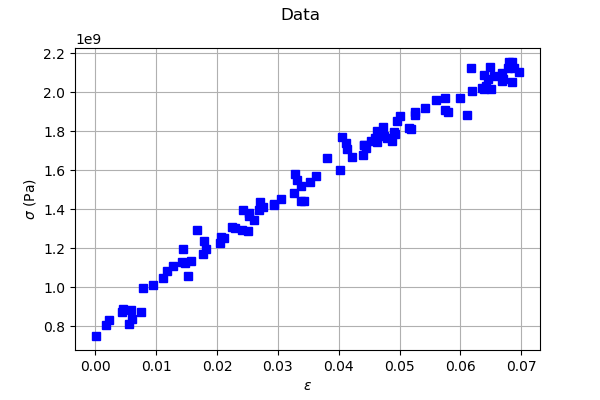

In [4]:
myGraph = ot.Graph('Data', '$\epsilon$', '$\sigma$ (Pa)', True, '')
myCloud = ot.Cloud(observedSample, 'blue', 'fsquare', 'My Cloud')
myGraph.add(myCloud)
myGraph